## 验证数据生成
运行data_meta_comb/gen_data.ipynb生成虚拟验证数据

## 训练


In [1]:
!lr=0.003 epochs=10  python ../train_eval_covar.py A B C D E

<class '__main__.TrainerDR'>
running_uuid 20230907_035202
<TrainerConfig: {"debug": false, "load_pretrain": null, "batch_size": 32, "epochs": 10, "image_size": 512, "lr": 0.003, "device": "cuda:0", "num_workers": 4, "model": "resnet50"}>
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.003
    lr: 0.003
    maximize: False
    weight_decay: 1e-05
)
epoch train mat  0 loss: 0.24735914223994593 type: train matrix epoch: 0 
Test epoch 0 loss: 0.17027927774259827 type: test matrix epoch: 0 
epoch train mat  1 loss: 0.15429650140401702 type: train matrix epoch: 1 
Test epoch 1 loss: 0.14208282814106918 type: test matrix epoch: 1 
epoch train mat  2 loss: 0.1355335490571613 type: train matrix epoch: 2 
Test epoch 2 230907_035202 epoch:2/10 batch 124/125 loss: 0.13620202643118495 type: test matrix epoch: 2 
epoch train mat  3 loss: 0.12490919568651293 type: train matrix epoch: 3 
Test epoch 3 loss: 0.11831930280950337 type: test matrix epoch

## 测试结果是否符合预期
由于检测的窗口为10年，因此，gt>10时， 算法对输入没有区分度

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pickle.load(open('./logs/TrainerDR_last/preds_9.pkl', 'rb'))

In [4]:
data

{'loss': tensor([0.1394, 0.1133, 0.1497, 0.0523, 0.1227, 0.0594, 0.0426, 0.0407, 0.1070,
         0.0761, 0.0781, 0.1241, 0.0808, 0.2137, 0.1272, 0.1195, 0.1505, 0.0731,
         0.1535, 0.0972, 0.0706, 0.0897, 0.0434, 0.0363, 0.0607, 0.0394, 0.0693,
         0.0904, 0.1121, 0.1155, 0.1553, 0.0926, 0.1523, 0.1101, 0.1615, 0.0828,
         0.3366, 0.0819, 0.0781, 0.1076, 0.0534, 0.0294, 0.1529, 0.0681, 0.1423,
         0.0889, 0.0682, 0.0534, 0.0573, 0.0693, 0.1328, 0.1128, 0.0501, 0.0705,
         0.1123, 0.1266, 0.0333, 0.1535, 0.1440, 0.0698, 0.1334, 0.1109, 0.0511,
         0.0474, 0.0535, 0.0654, 0.0832, 0.2015, 0.2062, 0.0510, 0.0841, 0.0709,
         0.0974, 0.1079, 0.0541, 0.0910, 0.0285, 0.1015, 0.1450, 0.0988, 0.0775,
         0.0655, 0.0261, 0.1383, 0.0518, 0.1364, 0.0805, 0.2288, 0.0528, 0.1128,
         0.0405, 0.1546, 0.0613, 0.0832, 0.0787, 0.0951, 0.1437, 0.0467, 0.1271,
         0.0365, 0.0733, 0.0863, 0.1049, 0.0957, 0.1127, 0.0236, 0.0440, 0.0381,
         0.1044, 0.1

0.32691744


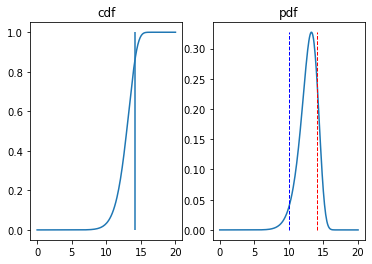

0.32693097


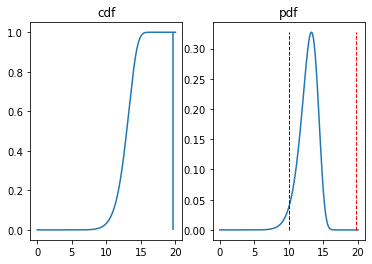

0.9957772


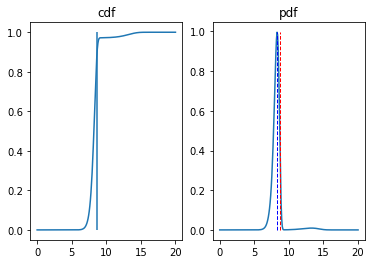

1.1419984


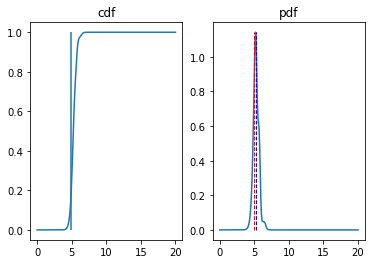

0.32646096


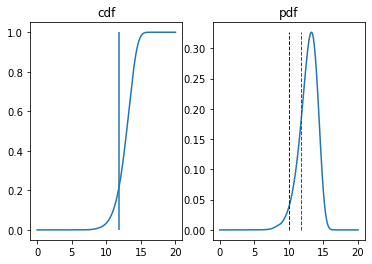

1.2786576


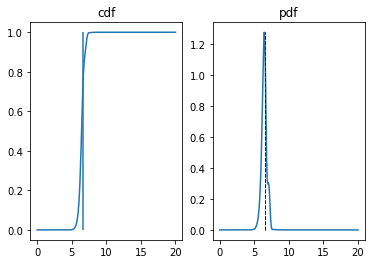

0.3112705


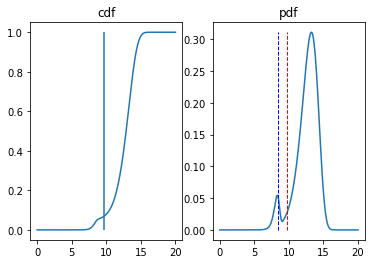

1.3025768


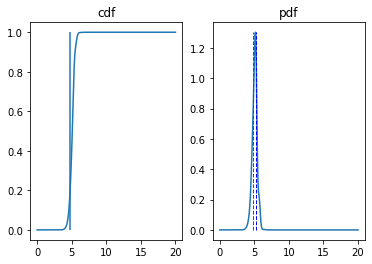

1.1425917


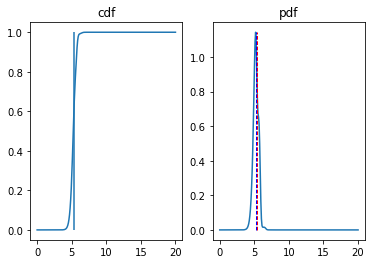

1.7234246


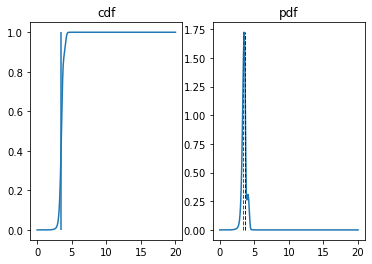

0.34765837


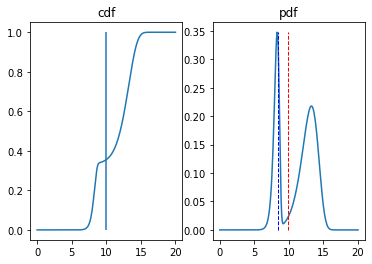

1.2720454


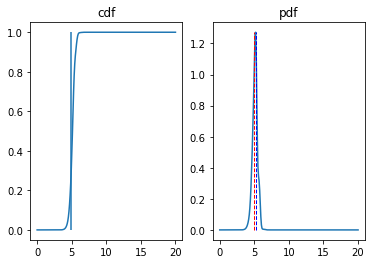

0.32693124


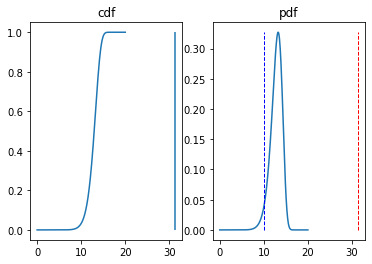

1.3850266


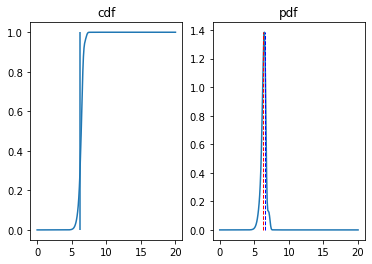

1.00819


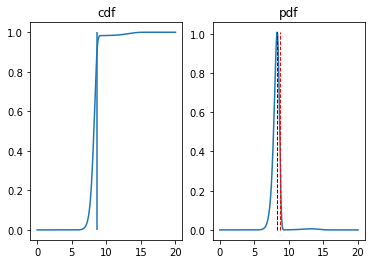

1.2750555


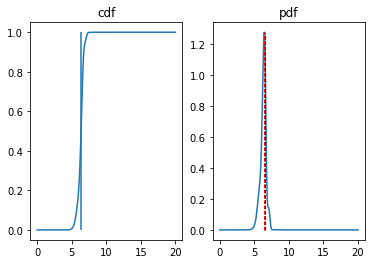

1.233074


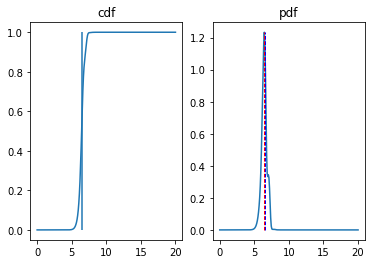

1.0402517


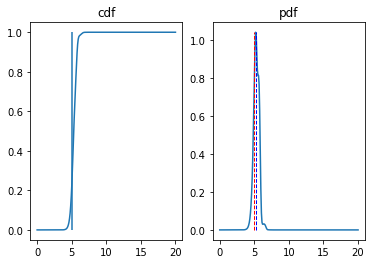

0.42559636


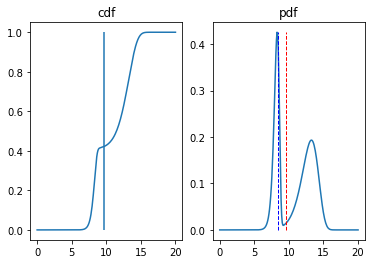

0.32693124


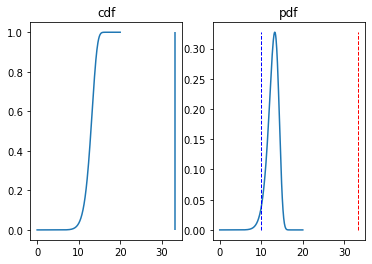

In [6]:
for i in range(20):
    plt.subplot(1, 2, 1)
    plt.plot(np.linspace(0, 20, 240), data['cdf'][i])
    plt.vlines(data['gt'][i],0,1)
    plt.title('cdf')
    plt.subplot(1, 2, 2)
    plt.plot(np.linspace(0, 20, 240),data['pdf'][i])
    maxval = np.max(data['pdf'][i].numpy()[1:])
    print(maxval)
    plt.vlines(data['gt'][i],0,maxval, color='r', linestyle='--', linewidth=1)
    plt.title('pdf')
    plt.vlines(data['survival_time'][i],0,maxval, color='b', linestyle='--', linewidth=1)
    plt.title('pdf')
    plt.show()